<a href="https://colab.research.google.com/github/sa-y-an/ywc/blob/main/WeSAD_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download the cleaned data 
!gdown --id 1XJLa-kXOT_cBORvOgRf84c3WnEkLX-dH

Downloading...
From: https://drive.google.com/uc?id=1XJLa-kXOT_cBORvOgRf84c3WnEkLX-dH
To: /content/wdata.zip
740MB [00:06, 121MB/s]


In [2]:
!unzip -q wdata.zip

In [3]:
source = '/content/wdata'

In [4]:
import pandas as pd

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
FEATURE_COLUMNS = ['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']

In [7]:
def two_class(x:int) :
    if x == 2 :
        return 0
        
    return x

In [8]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
def smoting_data(file_num : int ) :

    modal_file = source + "/Modalities/S{}_train.csv".format(file_num)
    # labels = pd.read_csv(label_file)
    modals = pd.read_csv(modal_file)
    modals.drop(['Unnamed: 0'], axis = 1, inplace= True)

    modals.drop(['series_id'], axis = 1 , inplace = True)

    labels = modals['label']

    modals.drop(['label'] , axis= 1 , inplace = True )

    modals = modals.to_numpy()
    labels.to_numpy()

    oversample = SMOTE(random_state = 42 )
    modals, labels = oversample.fit_resample(modals, labels)
    df = pd.DataFrame(modals , columns = FEATURE_COLUMNS )
    df['label'] = labels

    return df       

In [10]:
def create_sequences(data) : 

    seq = np.array([], dtype='int')

    for i in range(int(len(data)/700)) :
        temp = np.ones(shape = 700,dtype='int')*i
        seq = np.append(seq,temp)


    data['series_id'] = seq

    y_train = pd.DataFrame()
    y_train['series_id'] = data['series_id']
    y_train['label'] = data['label']



    y_train = y_train.groupby(['series_id']).mean()
    temp = range(int(len(data)/700))

    y_train['series_id'] = temp

    if (data.series_id.value_counts() == 700 ).sum() != len(y_train) :
        return "Values dont match"


    return data, y_train

In [11]:
def create_train_dataframe(file_num:int) :
    '''Returns modals and labels for a particular file num'''

    if file_num > 17 or file_num <2 :
        return "Give an entry between 2 and 17 "

    elif file_num == 12 :
        return "S12 is absent"

    df = smoting_data(file_num)
    modals, labels = create_sequences(df)


    series_id = modals[['series_id']]
    modals.drop(['label'], axis = 1, inplace= True)
    

    # uncomment when using two class classification
    # labels['label'] = labels['label'].apply(two_class)


    x_shape = (modals.series_id.value_counts() == 700).sum()

    if (modals.series_id.value_counts() == 700 ).sum() != len(labels) :
        return "Data sizes are incompatible, modal count = {} and label count = {}".format(x_shape, len(labels) )

    strn = "Data sizes are - modal count = {} and label count = {}".format(x_shape, len(labels) )
    print(strn)
    print(" Modals and labels created ..")


    modals.drop(['series_id'], axis= 1, inplace = True)
    columns = modals.columns

    

    # perform a robust scaler transform of the dataset
    trans = MinMaxScaler()
    modals = trans.fit_transform(modals)

    modals = pd.DataFrame(modals,columns= columns)
    modals['series_id'] = series_id


    print("Data Normalized with MIn MAx scaler")

    return modals,labels

In [12]:
def create_test_dataframe(file_num:int) :
    '''Returns modals and labels for a particular file num'''

    if file_num > 17 or file_num <2 :
        return "Give an entry between 2 and 17 "

    elif file_num == 12 :
        return "S12 is absent"

    label_file = source + "/Labels/S{}_label.csv".format(file_num)
    modal_file = source + "/Modalities/S{}_train.csv".format(file_num)
    labels = pd.read_csv(label_file)
    modals = pd.read_csv(modal_file)
    modals.drop(['Unnamed: 0'], axis = 1, inplace= True)
    print(modals.columns)
    series_id = modals[['series_id']]
    modals.drop(['label'], axis = 1, inplace= True)
    labels.drop(['series_id.1'], axis = 1 ,  inplace = True)

    # uncomment when using two class classification
    # labels['label'] = labels['label'].apply(two_class)


    x_shape = (modals.series_id.value_counts() == 700).sum()

    if (modals.series_id.value_counts() == 700 ).sum() != len(labels) :
        return "Data sizes are incompatible, modal count = {} and label count = {}".format(x_shape, len(labels) )

    strn = "Data sizes are - modal count = {} and label count = {}".format(x_shape, len(labels) )
    print(strn)
    print(" Modals and labels created ..")


    modals.drop(['series_id'], axis= 1, inplace = True)
    columns = modals.columns

    

    # perform a robust scaler transform of the dataset
    trans = MinMaxScaler()
    modals = trans.fit_transform(modals)

    modals = pd.DataFrame(modals,columns= columns)
    modals['series_id'] = series_id


    print("Data Normalized with MIn MAx scaler")

    return modals,labels

In [13]:
FEATURE_COLUMNS = ['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [15]:
def create_standard_data(seq_data,y_train) :


    # Features 
    FEATURE_COLUMNS = ['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']

    print("Standardinging data", end = " ")

    X = []
    y = []
    

    for series_id, group in seq_data.groupby("series_id") :
        
        scaler = StandardScaler()

        sequence_features = group[FEATURE_COLUMNS]
        label = y_train[y_train.series_id == series_id].iloc[0].label

        x = sequence_features.to_numpy()
        x = scaler.fit_transform(x)

        X.append(x)
        y.append(label)
        
        # sequences.append((sequence_features, label))

        # print("Sequences Created ")
    print()    
    X = np.array(X)
    y = np.array(y)

    return X,y

In [16]:
def get_train_data(file_num:int) :

    print()
    print("file num:{} ".format(file_num))
    print()
    
    modals, labels = create_train_dataframe(file_num)

    X,y = create_standard_data(modals,labels)

    return X,y

In [17]:
def get_test_data(file_num:int) :

    print()
    print("file num:{} ".format(file_num))
    print()
    
    modals, labels = create_test_dataframe(file_num)

    X,y = create_standard_data(modals,labels)

    return X,y

In [18]:
def create_train_data(train) :
    
    X_train, y_train = get_train_data(train[0])
    # y_train = get_train_data(train[0])


    for x in train[1:]:
        tempx, tempy = get_train_data(x)
        X_train = np.concatenate((X_train, tempx), axis = 0)
        y_train = np.concatenate((y_train, tempy), axis = 0 )

    print("Training Set Done !")    


    return X_train,y_train

In [19]:
def create_test_data(test) :

    X_test, y_test = get_test_data(test[0])


    for x in test[1:]:
        tempx, tempy = get_test_data(x)
        X_test = np.concatenate([X_test, tempx])
        y_test = np.concatenate([y_test, tempy])

    print("Testing Loop Done !")

    return X_test, y_test

In [20]:
train = [2,3,4,5,6,7,8,9,10,11,13,14]
test = [15,16,17]

In [21]:
X_train,y_train = create_test_data(train)


file num:2 

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label',
       'series_id'],
      dtype='object')
Data sizes are - modal count = 2121 and label count = 2121
 Modals and labels created ..
Data Normalized with MIn MAx scaler
Standardinging data 

file num:3 

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label',
       'series_id'],
      dtype='object')
Data sizes are - modal count = 2155 and label count = 2155
 Modals and labels created ..
Data Normalized with MIn MAx scaler
Standardinging data 

file num:4 

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label',
       'series_id'],
      dtype='object')
Data sizes are - modal count = 2165 and label count = 2165
 Modals and labels created ..
Data Normalized with MIn MAx scaler
Standardinging data 

file num:5 

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label',
       'series_id'],
      dtype='object')
Data sizes are - modal cou

In [22]:
X_train.shape, y_train.shape

((26422, 700, 8), (26422,))

In [23]:
X_test,y_test = create_test_data(test)


file num:15 

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label',
       'series_id'],
      dtype='object')
Data sizes are - modal count = 2233 and label count = 2233
 Modals and labels created ..
Data Normalized with MIn MAx scaler
Standardinging data 

file num:16 

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label',
       'series_id'],
      dtype='object')
Data sizes are - modal count = 2221 and label count = 2221
 Modals and labels created ..
Data Normalized with MIn MAx scaler
Standardinging data 

file num:17 

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label',
       'series_id'],
      dtype='object')
Data sizes are - modal count = 2276 and label count = 2276
 Modals and labels created ..
Data Normalized with MIn MAx scaler
Standardinging data 
Testing Loop Done !


In [24]:
X_test.shape, y_test.shape

((6730, 700, 8), (6730,))

In [25]:
num_classes = len(np.unique(y_train))
num_classes

3

In [26]:
n_classes = num_classes

In [27]:
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]

In [28]:
from tensorflow import keras
from tensorflow.keras import layers



### Transformer Model

In [29]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [30]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)


In [31]:
from sklearn.model_selection import train_test_split

# fix this line 

In [32]:
X_train, _ , y_train, _  = train_test_split(X_train, y_train , test_size = 0.5 , random_state = 42)

In [33]:
X_train.shape

(13211, 700, 8)

In [34]:
y_train.shape

(13211,)

## Training Loop

In [35]:
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 700, 8)]     0                                            
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 700, 8)       16          input_1[0][0]                    
__________________________________________________________________________________________________
multi_head_attention (MultiHead (None, 700, 8)       35848       layer_normalization[0][0]        
                                                                 layer_normalization[0][0]        
__________________________________________________________________________________________________
dropout (Dropout)               (None, 700, 8)       0           multi_head_attention[0][0]   

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = model.fit(
    X_train,
    y_train,
    validation_split=0.3,
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    verbose=1,
)

In [36]:
model.save('attention.h5')

In [37]:
model = keras.models.load_model("attention.h5")

In [38]:
import matplotlib.pyplot as plt

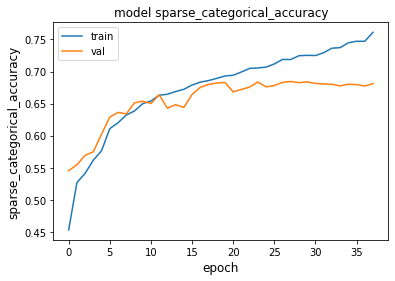

In [39]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

# Testing Code

In [40]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

211/211 [==============================] - 70s 330ms/step - loss: 0.8401 - sparse_categorical_accuracy: 0.6678
Test accuracy 0.6677563190460205
Test loss 0.8401078581809998


In [41]:
def ptest_acc(X_test,y_test ) : 

    test_loss, test_acc = model.evaluate(X_test, y_test)

    print("Test accuracy", test_acc)
    print("Test loss", test_loss)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
def confu(X,y_true) :

    y_pred = np.argmax(model.predict(X), axis = 1)
    cnm = confusion_matrix(y_true, y_pred)
    cp = classification_report(y_true, y_pred)

    print("confusion matrix")
    print(cnm)
    print("classification report")
    print(cp)

In [44]:
X15, y15 = get_test_data(15)


file num:15 

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label',
       'series_id'],
      dtype='object')
Data sizes are - modal count = 2233 and label count = 2233
 Modals and labels created ..
Data Normalized with MIn MAx scaler
Standardinging data 


In [45]:
confu(X15,y15)

confusion matrix
[[1085   89    1]
 [ 552  132    2]
 [ 365    5    2]]
classification report
              precision    recall  f1-score   support

           0       0.54      0.92      0.68      1175
           1       0.58      0.19      0.29       686
           2       0.40      0.01      0.01       372

    accuracy                           0.55      2233
   macro avg       0.51      0.37      0.33      2233
weighted avg       0.53      0.55      0.45      2233



In [46]:
X16, y16 = get_test_data(16)


file num:16 

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label',
       'series_id'],
      dtype='object')
Data sizes are - modal count = 2221 and label count = 2221
 Modals and labels created ..
Data Normalized with MIn MAx scaler
Standardinging data 


In [47]:
confu(X16,y16)

confusion matrix
[[1131   45    4]
 [ 134  535    4]
 [ 346   22    0]]
classification report
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      1180
           1       0.89      0.79      0.84       673
           2       0.00      0.00      0.00       368

    accuracy                           0.75      2221
   macro avg       0.53      0.58      0.55      2221
weighted avg       0.64      0.75      0.68      2221



In [48]:
X17, y17 = get_test_data(17)


file num:17 

Index(['ACCX', 'ACCY', 'ACCZ', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp', 'label',
       'series_id'],
      dtype='object')
Data sizes are - modal count = 2276 and label count = 2276
 Modals and labels created ..
Data Normalized with MIn MAx scaler
Standardinging data 


In [49]:
confu(X17,y17)

confusion matrix
[[1095   80    6]
 [ 211  512    0]
 [ 307   63    2]]
classification report
              precision    recall  f1-score   support

           0       0.68      0.93      0.78      1181
           1       0.78      0.71      0.74       723
           2       0.25      0.01      0.01       372

    accuracy                           0.71      2276
   macro avg       0.57      0.55      0.51      2276
weighted avg       0.64      0.71      0.64      2276



In [50]:
confu(X_test, y_test)

confusion matrix
[[3311  214   11]
 [ 897 1179    6]
 [1018   90    4]]
classification report
              precision    recall  f1-score   support

           0       0.63      0.94      0.76      3536
           1       0.80      0.57      0.66      2082
           2       0.19      0.00      0.01      1112

    accuracy                           0.67      6730
   macro avg       0.54      0.50      0.47      6730
weighted avg       0.61      0.67      0.60      6730

